In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
drugs_df = pd.read_csv('C:\\Users\\hites\\Downloads\\Compressed\\drugsComTrain_raw.csv')

In [3]:
drugs_df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [4]:
drugs_df = drugs_df.drop(['uniqueID'],axis=1)

In [5]:
drugs_df.head()

,drugName,condition,review,rating,date,usefulCount
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [6]:
# Number of null values in each column
drugs_df.isnull().sum()

drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

In [7]:
# Unique values in each column
drugs_df.nunique()

drugName         3436
condition         884
review         112329
rating             10
date             3579
usefulCount       389
dtype: int64

In [8]:
drugs_df.describe()

,rating,usefulCount
count,161297.000000,161297.000000
mean,6.994377,28.004755
std,3.272329,36.403742
min,1.000000,0.000000
25%,5.000000,6.000000
50%,8.000000,16.000000
75%,10.000000,36.000000
max,10.000000,1291.000000


In [9]:
# Drop Condition null rows from the dataset
drugs_df.dropna(subset=['condition'], how='all', inplace=True)

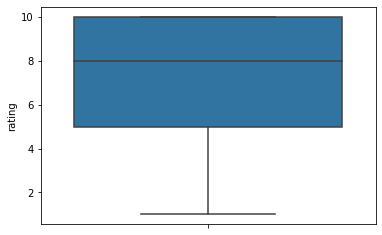

In [10]:
# Rating column boxplot

sns.boxplot(drugs_df['rating'],orient='vertical')

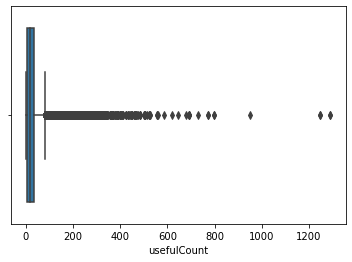

In [11]:
# usefulcount column boxplot
sns.boxplot(drugs_df['usefulCount'],orient='horizontal')

In [12]:
# Bucketing the ratings in positive, negative and neutral into a new column Sentiment

drugs_df.loc[drugs_df['rating'] <= 4, 'Sentiment'] = 'Negative'
drugs_df.loc[drugs_df['rating'] >= 7, 'Sentiment'] = 'Positive'
drugs_df.loc[(drugs_df['rating'] > 4) & (drugs_df['rating'] < 7), 'Sentiment'] = 'Neutral'

In [13]:
# Drug name along with its rating and usefulCount


drugs_df.groupby(['drugName','rating'])['usefulCount'].count()

drugName                              rating
A + D Cracked Skin Relief             10         1
A / B Otic                            10         1
Abacavir / dolutegravir / lamivudine  1          1
                                      3          2
                                      4          3
                                                ..
ella                                  8          8
                                      9          5
                                      10        18
femhrt                                1          2
                                      10         1
Name: usefulCount, Length: 15009, dtype: int64

In [14]:
# Drugs count based on the sentiment for each drug

drugs_df.groupby(['drugName','Sentiment'])['usefulCount'].count().sort_values(ascending=False)

drugName                           Sentiment
Levonorgestrel                     Positive     2544
Etonogestrel                       Positive     1581
Phentermine                        Positive     1377
Ethinyl estradiol / norethindrone  Positive     1302
Etonogestrel                       Negative     1292
                                                ... 
Juvederm Voluma XC                 Positive        1
Junel Fe 24                        Neutral         1
Junel 1.5 / 30                     Positive        1
Junel 1 / 20                       Neutral         1
A + D Cracked Skin Relief          Positive        1
Name: usefulCount, Length: 6741, dtype: int64

In [15]:
# Updating the stopwords list by adding dataset specific stop words into the stop words list already in the sklearn 

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as esw
stopWords = ["got",
"did",
"took",
"just",
"taking",
"feel",
"doctor",
"felt",
"went",
"having",
"ago",
"used",
"going",
"using",
"use",
"amp",
"think",
"does",
"things",
"overall",
"similar",
"instructions",
"039"
"alas",
"form",
"said",
"began",
"im"
] + list(esw) 

In [34]:
X=drugs_df['review_clean'].values

In [17]:
y=drugs_df['rating'].values

In [18]:
training_labels = set(y)
print(training_labels)

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}


In [19]:
# Reviews rating with their count for each rating how many reviews are present
training_category_dist = np.unique(y, return_counts = True)
print(training_category_dist)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64), array([21504,  6879,  6465,  4980,  7959,  6301,  9395, 18791, 27379,
       50745], dtype=int64))


In [20]:
# Removing patterns, strings, punctuation to clean the text review data 

drugs_df['review_clean']=drugs_df['review'].str.lower().str.replace("&#039;", "").str.replace("11&quot;","").str.replace("&quot;","").str.replace("&rsquo;","").str.replace("&amp;","").str.replace("&gt;","").str.replace("â˜º","").str.replace("\r\n","").str.replace("\r\r\n\r\r\n","").str.replace(r'[^\w\d\s]',' ').str.replace(r'\s+',' ')

In [21]:
drugs_df['review_clean']

0          it has no side effect i take it in combinatio...
1          my son is halfway through his fourth week of ...
2          i used to take another oral contraceptive whi...
3          this is my first time using any form of birth...
4          suboxone has completely turned my life around...
                                ...                        
161292     i wrote my first report in mid october of 201...
161293     i was given this in iv before surgey i immedi...
161294     limited improvement after 4 months developed ...
161295     ive been on thyroid medication 49 years i spe...
161296     ive had chronic constipation all my adult lif...
Name: review_clean, Length: 160398, dtype: object

In [22]:
# Remove stop words from the review data
drugs_df['review_clean'] = drugs_df['review_clean'].apply(lambda x: ' '.join(word for word in x.split() if word not in stopWords))

In [35]:
# Vectorize the data 

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#  unigram and bigram term frequency vectorizer, set minimum document frequency to 5
gram12_count_vectorizer = CountVectorizer(encoding='latin-1', ngram_range=(2,2), min_df=3)

#  unigram tfidf vectorizer, set minimum document frequency to 5
unigram_tfidf_vectorizer = TfidfVectorizer(encoding='latin-1', use_idf=True, min_df=5)

In [36]:
X_fit = gram12_count_vectorizer.fit(X)
X_transform = X_fit.transform(X)
X_train_vec = gram12_count_vectorizer.fit_transform(X)

# check the content of a document vector
print(X_train_vec.shape)
print(X_train_vec[0].toarray())

# check the size of the constructed vocabulary
print(len(gram12_count_vectorizer.vocabulary_))

# print out the first 10 items in the vocabulary
print(list(gram12_count_vectorizer.vocabulary_.items())[:50])
# check word index in vocabulary
print(gram12_count_vectorizer.vocabulary_)

(160398, 322785)
[[0 0 0 ... 0 0 0]]
322785
[('effect combination', 89715), ('combination bystolic', 51389), ('bystolic mg', 41940), ('fish oil', 107748), ('fourth week', 110596), ('week intuniv', 304949), ('week started', 305416), ('started highest', 261352), ('highest dose', 130843), ('dose days', 81825), ('days hardly', 67984), ('hardly bed', 124032), ('slept nearly', 254395), ('nearly hours', 192315), ('hours drive', 134838), ('drive home', 84777), ('home school', 131658), ('monday morning', 184342), ('stick days', 263758), ('days school', 68593), ('school getting', 244858), ('getting morning', 115239), ('morning days', 188511), ('days problem', 68470), ('problem free', 224114), ('emotional good', 93401), ('good thing', 118547), ('behavior better', 31236), ('better tried', 33586), ('tried different', 290961), ('different medications', 76265), ('medications far', 176181), ('far effective', 102815), ('oral contraceptive', 202794), ('21 pill', 5287), ('pill cycle', 213685), ('cycle ha

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [37]:
# Vocabulary of words

vocab = list(gram12_count_vectorizer.vocabulary_.keys())

In [38]:
vocab

['effect combination',
 'combination bystolic',
 'bystolic mg',
 'fish oil',
 'fourth week',
 'week intuniv',
 'week started',
 'started highest',
 'highest dose',
 'dose days',
 'days hardly',
 'hardly bed',
 'slept nearly',
 'nearly hours',
 'hours drive',
 'drive home',
 'home school',
 'monday morning',
 'stick days',
 'days school',
 'school getting',
 'getting morning',
 'morning days',
 'days problem',
 'problem free',
 'emotional good',
 'good thing',
 'behavior better',
 'better tried',
 'tried different',
 'different medications',
 'medications far',
 'far effective',
 'oral contraceptive',
 '21 pill',
 'pill cycle',
 'cycle happy',
 'light periods',
 'periods max',
 'max days',
 'days effects',
 'available switched',
 'pills ended',
 'ended started',
 'started lybrel',
 'immediately day',
 'day period',
 'period period',
 'period lasted',
 'lasted weeks',
 'weeks second',
 'second pack',
 'pack weeks',
 'weeks pack',
 'pack worse',
 'worse period',
 'weeks end',
 'end week',

In [41]:
word_freq = zip(X_fit.get_feature_names(),
    np.asarray(X_train_vec.sum(axis=0)).ravel())

In [39]:
sum_words = X_transform.sum(axis=0)

In [40]:
# Bigrams from Count Vectorizer along with the frequency of their occurence

words_freq = [(word, sum_words[0, idx]) for word, idx in X_fit.vocabulary_.items()]
sorted(words_freq, key = lambda x: x[1], reverse=True)[:25]

[('birth control', 15159),
 ('weight gain', 8361),
 ('mood swings', 7720),
 ('sex drive', 5798),
 ('years old', 4171),
 ('blood pressure', 4019),
 ('panic attacks', 3756),
 ('dont know', 2959),
 ('year old', 2895),
 ('dry mouth', 2890),
 ('twice day', 2681),
 ('times day', 2620),
 ('weight loss', 2558),
 ('really bad', 2466),
 ('ive tried', 2390),
 ('highly recommend', 2310),
 ('10 years', 2290),
 ('gained weight', 2190),
 ('works great', 2087),
 ('depression anxiety', 2079),
 ('changed life', 2073),
 ('anxiety depression', 1830),
 ('couple days', 1791),
 ('10 days', 1760),
 ('gain weight', 1749)]

In [127]:
# Writing the output of bigrams with their occurences to the csv file
import csv
RESULTS = new_woc
resultFyle = open("output_new_woc.csv",'w')

# Write data to file
for r in RESULTS:
    resultFyle.write(r + "\n")
resultFyle.close()

In [42]:
# Negative reviews drugs along with their count


drugs_df.groupby([drugs_df.loc[drugs_df['Sentiment'] == 'Negative','drugName']])['usefulCount'].count().sort_values(ascending=False)

drugName
Etonogestrel                         1292
Ethinyl estradiol / norethindrone    1139
Nexplanon                             870
Ethinyl estradiol / norgestimate      764
Levonorgestrel                        738
                                     ... 
Icosapent                               1
Ilevro                                  1
Condylox                                1
Prezista                                1
Naloxone                                1
Name: usefulCount, Length: 2083, dtype: int64

In [43]:
drugs_df[drugs_df['condition'] == '4</span> users found this comment helpful.']['drugName'].count()

66

In [44]:
drugs_df[drugs_df['condition'] == '3</span> users found this comment helpful.']['drugName'].count()

84

In [45]:
drugs_df[drugs_df['condition'] == '2</span> users found this comment helpful.']['drugName'].count()

85

In [46]:
drugs_df['review_clean']

0                 effect combination bystolic 5 mg fish oil
1         son halfway fourth week intuniv concerned week...
2         oral contraceptive 21 pill cycle happy light p...
3         time birth control glad patch 8 months decreas...
4         suboxone completely turned life healthier exce...
                                ...                        
161292    wrote report mid october 2014 alcohol post red...
161293    given iv surgey immediately anxious sit pa oh ...
161294    limited improvement 4 months developed bad ras...
161295    ive thyroid medication 49 years spent 38 synth...
161296    ive chronic constipation adult life tried linz...
Name: review_clean, Length: 160398, dtype: object

In [47]:
# Positive reviews drugs count
pos_drugs = dict(drugs_df.loc[drugs_df['Sentiment'] == 'Positive','drugName'].value_counts())

In [48]:
# Drug Names for positive reviews
drug_pos = list(pos_drugs.keys())

In [49]:
# Count for drugs for positive reviews
pos_senti_count = list(pos_drugs.values())

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

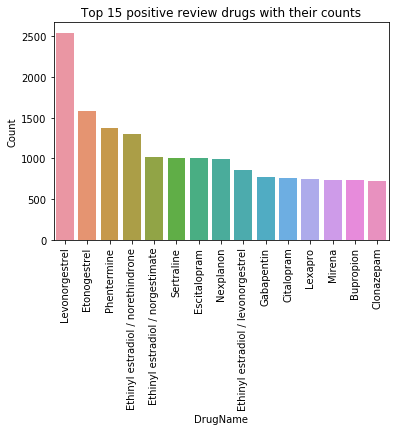

In [50]:
# Top 15 Drugs which have positive reviews along with their count

pos_se_drugs = sns.barplot(x = drug_pos[0:15], y = pos_senti_count[0:15])

plt.xlabel("DrugName")
plt.ylabel("Count")
plt.title("Top 15 positive review drugs with their counts")
plt.xticks(rotation=90)

In [51]:
# Negative reviews drugs count
neg_drugs = dict(drugs_df.loc[drugs_df['Sentiment'] == 'Negative','drugName'].value_counts())

In [52]:
# Drug Names for negative reviews
drug_neg = list(pos_drugs.keys())

In [53]:
# Count for drugs for positive reviews
neg_senti_count = list(neg_drugs.values())

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

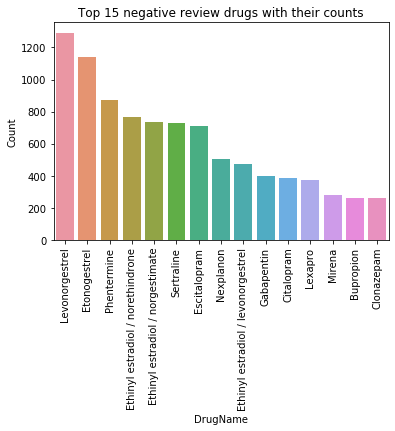

In [54]:
# Top 15 Drugs which have negative reviews along with their count

neg_se_drugs = sns.barplot(x = drug_neg[0:15], y = neg_senti_count[0:15])

plt.xlabel("DrugName")
plt.ylabel("Count")
plt.title("Top 15 negative review drugs with their counts")
plt.xticks(rotation=90)

In [55]:
con_top = dict(drugs_df['condition'].value_counts())

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

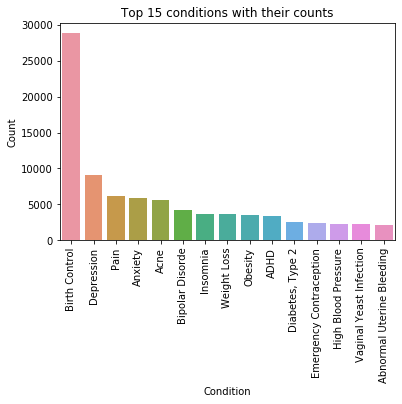

In [56]:
con_top_15 = sns.barplot(x = list(con_top.keys())[0:15], y = list(con_top.values())[0:15])

plt.xlabel("Condition")
plt.ylabel("Count")
plt.title("Top 15 conditions with their counts")
plt.xticks(rotation=90)